# Problemas de Estadística Descriptiva

## Ejercicio 1 – ¿Qué tan largos son los títulos de las películas?

En este ejercicio vas a aplicar técnicas de estadística descriptiva sobre un conjunto de datos real: una base con 1000 películas populares del sitio IMDb.

A partir del título de cada película, vas a:
- Calcular la longitud del título (en caracteres).
- Obtener métricas estadísticas clave: media, mediana, moda, rango, varianza, desviación estándar, asimetría y curtosis.
- Identificar los títulos más largos y más cortos.
- Visualizar la distribución de estas longitudes con un histograma y una curva de densidad.


In [29]:
# Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, mode
from scipy.stats import gaussian_kde


# Cargar dataset de IMDb
url = "../assets/imdb_1000.csv"
df = pd.read_csv(url)
df

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G..."
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr..."


In [30]:
# Crea una nueva columna llamada 'title_length' con la longitud (número de caracteres) de cada título
df['title_length']=df['title'].str.len()
df


,star_rating,title,content_rating,genre,duration,actors_list,title_length
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...",24
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']",13
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv...",22
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E...",15
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L....",12
...,...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G...",7
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma...",27
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo...",47
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr...",11


In [40]:
# Calcula media, mediana y moda de la columna 'title_length'
mean = df['title_length'].mean()
mean

np.float64(15.481103166496425)

In [41]:
median = df['title_length'].median()
median

np.float64(14.0)

In [42]:
mode = df['title_length'].mode()
mode

0    12
Name: title_length, dtype: int64

In [32]:
# Calcula el rango, la varianza y la desviación estándar de 'title_length'


rango = df['title_length'].max() - df['title_length'].min()
#rango

varianza = df['title_length'].var()
#varianza

desviacion = df['title_length'].std()
desviacion

np.float64(8.491569282766807)

In [33]:
# Calcula asimetría y curtosis de la columna 'title_length'

asimtr = df['title_length'].skew()
#asimtr

curt = df['title_length'].kurt()
curt, asimtr

(np.float64(3.8122887061291544), np.float64(1.5252523464631278))

In [34]:
# Imprime el título más corto y el título más largo según su longitud
largo = df['title_length'].max()
res = df.loc[df['title_length'] == largo, 'title']
res

corto = df['title_length'].min()
res1 = df.loc[df['title_length'] == corto, 'title']

res, res1

(48    Dr. Strangelove or: How I Learned to Stop Worr...
 Name: title, dtype: object,
 63    M
 Name: title, dtype: object)

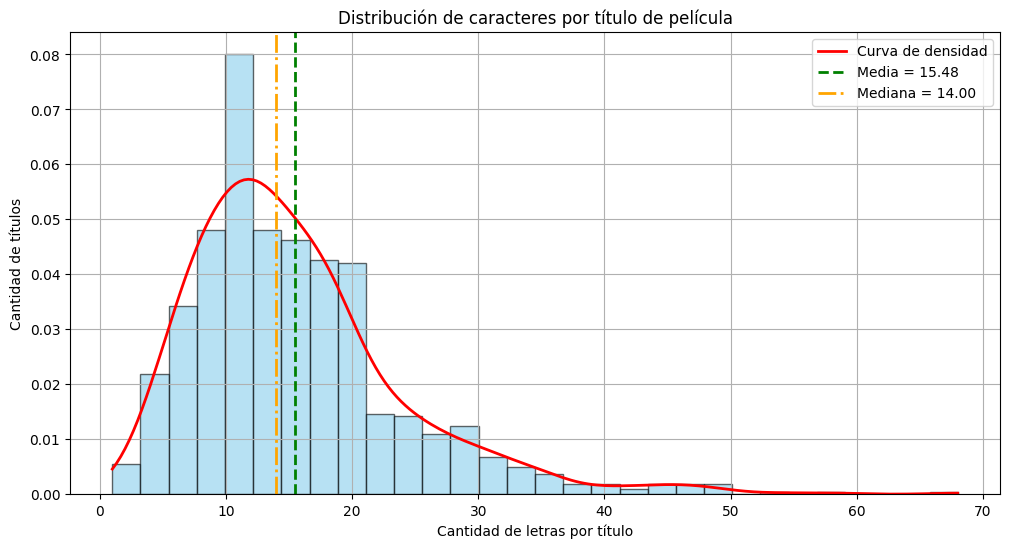

In [45]:
# grafica tus resultados

plt.figure(figsize=(12,6))

plt.hist(df['title_length'], bins = 30, color='skyblue', edgecolor='black', alpha=0.6, density=True)

kde = gaussian_kde(df['title_length'])
x = np.linspace(df['title_length'].min(), df['title_length'].max(), 200)
plt.plot(x, kde(x), color='red', lw=2, label='Curva de densidad')

plt.axvline(mean, color='green', linestyle='--', lw=2, label=f'Media = {mean:.2f}')
plt.axvline(median, color='orange', linestyle='-.', lw=2, label=f'Mediana = {median:.2f}')


plt.title('Distribución de caracteres por título de película')
plt.xlabel('Cantidad de letras por título')
plt.ylabel('Cantidad de títulos')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

---

## Ejercicio 2 – Cálculo manual de desviación estándar

En este ejercicio vas a calcular manualmente la desviación estándar, seleccionando cinco títulos reales del dataset de películas que cargaste antes.


In [36]:
# Crea una lista con 5 valores reales de df['title_length'], por ejemplo: [10, 13, 14, 18, 22]
list = df['title_length'].head(5).tolist()
list

[24, 13, 22, 15, 12]

In [37]:
# Calcula la media de los 5 valores

media = sum(list)/len(list)
media

17.2

In [38]:
# Calcula las diferencias al cuadrado con respecto a la media
dif_sqr = []
for i in list:
    dif = i - media
    sqr = dif ** 2
    dif_sqr.append(round(sqr,2))
dif_sqr

[46.24, 17.64, 23.04, 4.84, 27.04]

In [39]:
import statistics
# Calcula la varianza (promedio de las diferencias al cuadrado) y su raíz cuadrada para obtener la desviación
variance = statistics.variance(list)
#raíz quadrada
root_sqr = statistics.stdev(list)

variance, root_sqr

(29.7, 5.449770637375485)